# Model Evaluation

In [1]:
import pandas as pd
import joblib
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
gb_model = joblib.load("../models/final_gradient_boosting_model.pkl")

X_test = pd.read_csv("../data/processed/X_test.csv")
y_test = pd.read_csv("../data/processed/y_test.csv")

# Selected features (same as in Task 5)
selected_features = [
    'tenure', 
    'InternetService_Fiber optic',
    'OnlineSecurity_No internet service',
    'OnlineBackup_No internet service',
    'DeviceProtection_No internet service',
    'TechSupport_No internet service',
    'StreamingTV_No internet service',
    'StreamingMovies_No internet service',
    'Contract_Two year',
    'PaymentMethod_Electronic check'
]

X_test = X_test[selected_features]

# --- Make predictions ---
y_pred = gb_model.predict(X_test)
y_pred_proba = gb_model.predict_proba(X_test)[:, 1]

In [3]:
# --- Evaluate metrics ---
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

print("📊 Model Evaluation Results:")
print(f"Accuracy:  {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall:    {recall:.3f}")
print(f"F1-Score:  {f1:.3f}")
print(f"ROC-AUC:   {roc_auc:.3f}")

📊 Model Evaluation Results:
Accuracy:  0.795
Precision: 0.645
Recall:    0.499
F1-Score:  0.562
ROC-AUC:   0.840


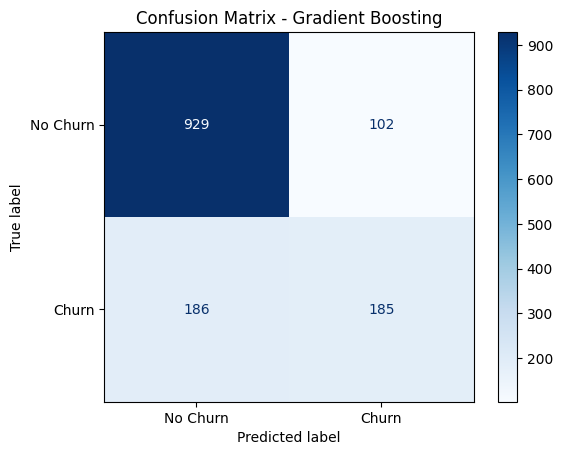

In [4]:
# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn', 'Churn'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()

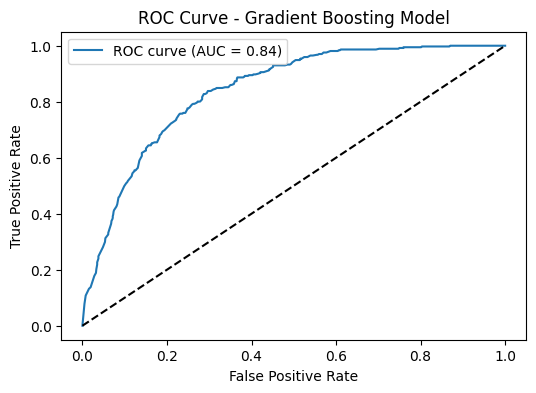

C:\Users\arsem\AppData\Local\Temp\ipykernel_30548\947222180.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_imp.values, y=feature_imp.index, palette="viridis")


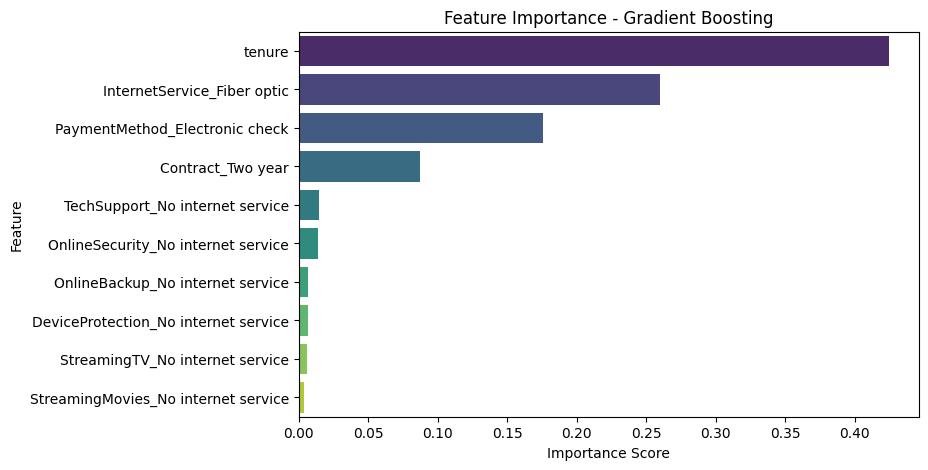

In [5]:
# --- ROC Curve ---
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Gradient Boosting Model")
plt.legend()
plt.show()

# --- Feature Importance ---
importances = gb_model.feature_importances_
feature_imp = pd.Series(importances, index=selected_features).sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=feature_imp.values, y=feature_imp.index, palette="viridis")
plt.title("Feature Importance - Gradient Boosting")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

### 📘 Interpretation

* Accuracy (79.5%) → The model correctly predicted customer churn and non-churn for about 8 out of 10 cases.

* Precision (0.65) → When it predicts a customer will churn, it’s right 65 % of the time — good for minimizing false alarms.

* Recall (0.50) → It captures about half of all actual churners — acceptable, but could be improved (perhaps by tuning for higher sensitivity).

* F1 (0.56) → Balanced trade-off between precision and recall.

* ROC-AUC (0.84) → Excellent overall discrimination between churners and non-churners; the model separates the two classes well.

### 🧩 Confusion Matrix Insights
* Predicted No Churn	Predicted Churn
* Actual No Churn	929	102
* Actual Churn	186	185

#### True Positives (185): Correctly identified churners.

#### False Negatives (186): Missed churners (improving recall would target this).

#### True Negatives (929): Correctly retained customers predicted as non-churn.

#### False Positives (102): Non-churners wrongly flagged as churn (slightly increases precision trade-off).